# Capstone 2 - Lending Club Loan Defaults Prediction¶

# Exploratory Data Analysis(EDA)


EDA is the third step in the Data Science Method.  The following will be performed in this step:

1. Build data profile tables and plots
2. Outliers & Anomalies
3. Explore data relationships
4. Identification and creation of features

In [1]:
#load python packages
import os
import pandas as pd
import pandas.api.types as ptypes
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Read data output created in the Data Wrangling step
df = pd.read_csv("../Data_Wrangling/data/Cap2_step2_output.csv", dtype={'verification_status_joint':object,'hardship_type':object, 'hardship_reason':object, 'hardship_status':object,'hardship_loan_status':object,'settlement_status':object}, index_col="Unnamed: 0")
df.head(5)

C:\Users\Umesh\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0       2500         2500           2500.0   36 months     13.56        84.92   
1      30000        30000          30000.0   60 months     18.94       777.23   
2       5000         5000           5000.0   36 months     17.97       180.69   
3       4000         4000           4000.0   36 months     18.94       146.51   
4      30000        30000          30000.0   60 months     16.14       731.78   

  grade sub_grade home_ownership  annual_inc  ... hardship_dpd  \
0     C        C1           RENT     55000.0  ...          0.0   
1     D        D2       MORTGAGE     90000.0  ...          0.0   
2     D        D1       MORTGAGE     59280.0  ...          0.0   
3     D        D2       MORTGAGE     92000.0  ...          0.0   
4     C        C4       MORTGAGE     57250.0  ...          0.0   

  hardship_loan_status orig_projected_additional_accrued_interest  \
0                  NaN                                        0.0   
1                  NaN                                        0.0   
2                  NaN                                        0.0   
3                  NaN                                        0.0   
4                  NaN                                        0.0   

  hardship_payoff_balance_amount hardship_last_payment_amount  \
0                            0.0                          0.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

  debt_settlement_flag  settlement_status  settlement_amount  \
0                    N                NaN                0.0   
1                    N                NaN                0.0   
2                    N                NaN                0.0   
3                    N                NaN                0.0   
4                    N                NaN                0.0   

   settlement_percentage  settlement_term  
0                    0.0              0.0  
1                    0.0              0.0  
2                    0.0              0.0  
3                    0.0              0.0  
4                    0.0              0.0  

[5 rows x 97 columns]

## Build data profile

In [3]:
desc = df.describe()
desc.T

count          mean          std     min  \
loan_amnt                       2260668.0  15046.931228  9190.245488  500.00   
funded_amnt                     2260668.0  15041.664057  9188.413022  500.00   
funded_amnt_inv                 2260668.0  15023.437624  9192.331807    0.00   
int_rate                        2260668.0     13.092913     4.832114    5.31   
installment                     2260668.0    445.807646   267.173725    4.93   
...                                   ...           ...          ...     ...   
hardship_payoff_balance_amount  2260668.0     54.589330   950.792435    0.00   
hardship_last_payment_amount    2260668.0      0.908910    18.986015    0.00   
settlement_amount               2260668.0     73.558675   750.962522    0.00   
settlement_percentage           2260668.0      0.698586     5.802958    0.00   
settlement_term                 2260668.0      0.192262     1.863421    0.00   

                                    25%       50%       75%       max  
loan_amnt                       8000.00  12900.00  20000.00  40000.00  
funded_amnt                     8000.00  12875.00  20000.00  40000.00  
funded_amnt_inv                 8000.00  12800.00  20000.00  40000.00  
int_rate                           9.49     12.62     15.99     30.99  
installment                      251.65    377.99    593.32   1719.83  
...                                 ...       ...       ...       ...  
hardship_payoff_balance_amount     0.00      0.00      0.00  40306.41  
hardship_last_payment_amount       0.00      0.00      0.00   1407.86  
settlement_amount                  0.00      0.00      0.00  33601.00  
settlement_percentage              0.00      0.00      0.00    521.35  
settlement_term                    0.00      0.00      0.00    181.00  

[77 rows x 8 columns]

In [4]:
desc['annual_inc']

count    2.260668e+06
mean     7.799229e+04
std      1.126961e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2260668 entries, 0 to 2260667
Data columns (total 97 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   loan_amnt                                   int64  
 1   funded_amnt                                 int64  
 2   funded_amnt_inv                             float64
 3   term                                        object 
 4   int_rate                                    float64
 5   installment                                 float64
 6   grade                                       object 
 7   sub_grade                                   object 
 8   home_ownership                              object 
 9   annual_inc                                  float64
 10  verification_status                         object 
 11  loan_status                                 object 
 12  pymnt_plan                                  object 
 13  title                      

Create histograms for numeric data.

In [6]:
df_num_select = df.select_dtypes(include=[np.number])

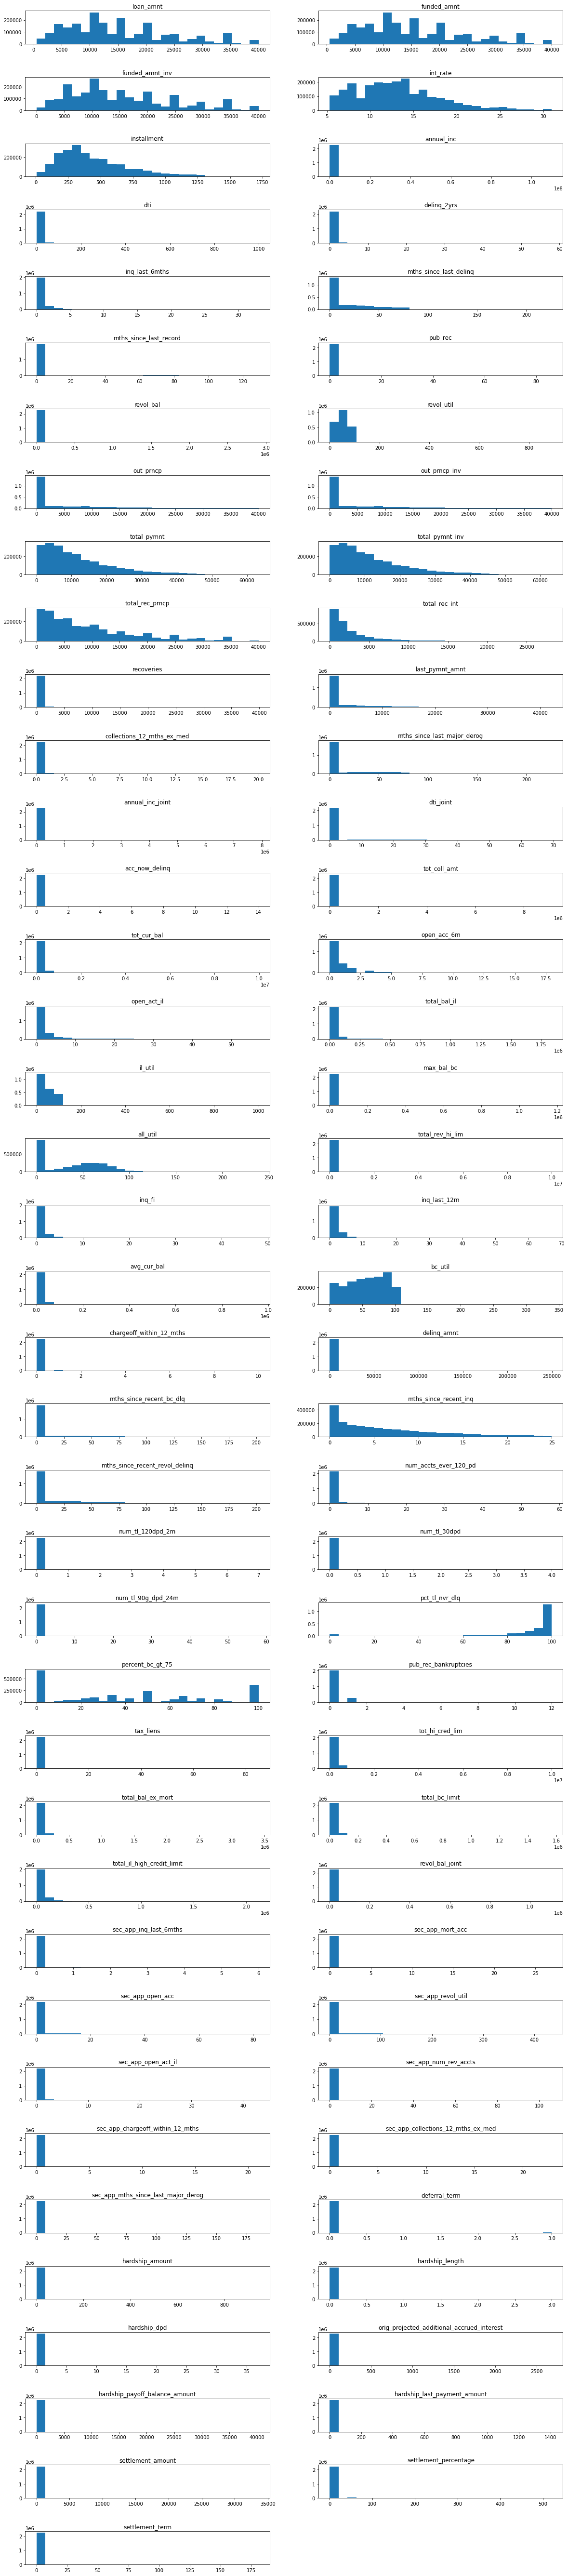

In [7]:
num_columns = df_num_select.columns
i = 1
plt.figure(figsize=(20,100))
plt.subplots_adjust(hspace=1)
for col in num_columns:
    _ = plt.subplot(40, 2, i)
    _ = plt.hist(df_num_select[col], bins=25)
    _ = plt.title(col)
    i = i + 1

In [8]:
#df_num_select.plot(subplots=True, kind='hist', bins=25, layout=(40, 2), figsize=(20,20), loglog=True)

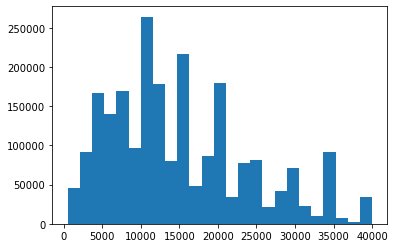

In [9]:
_ = plt.hist(df_num_select['loan_amnt'], bins=25)

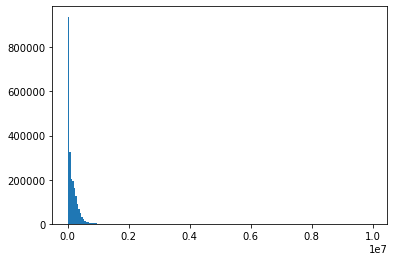

In [10]:
_ = plt.hist(df_num_select['tot_cur_bal'], bins=200)

Create boxplots.

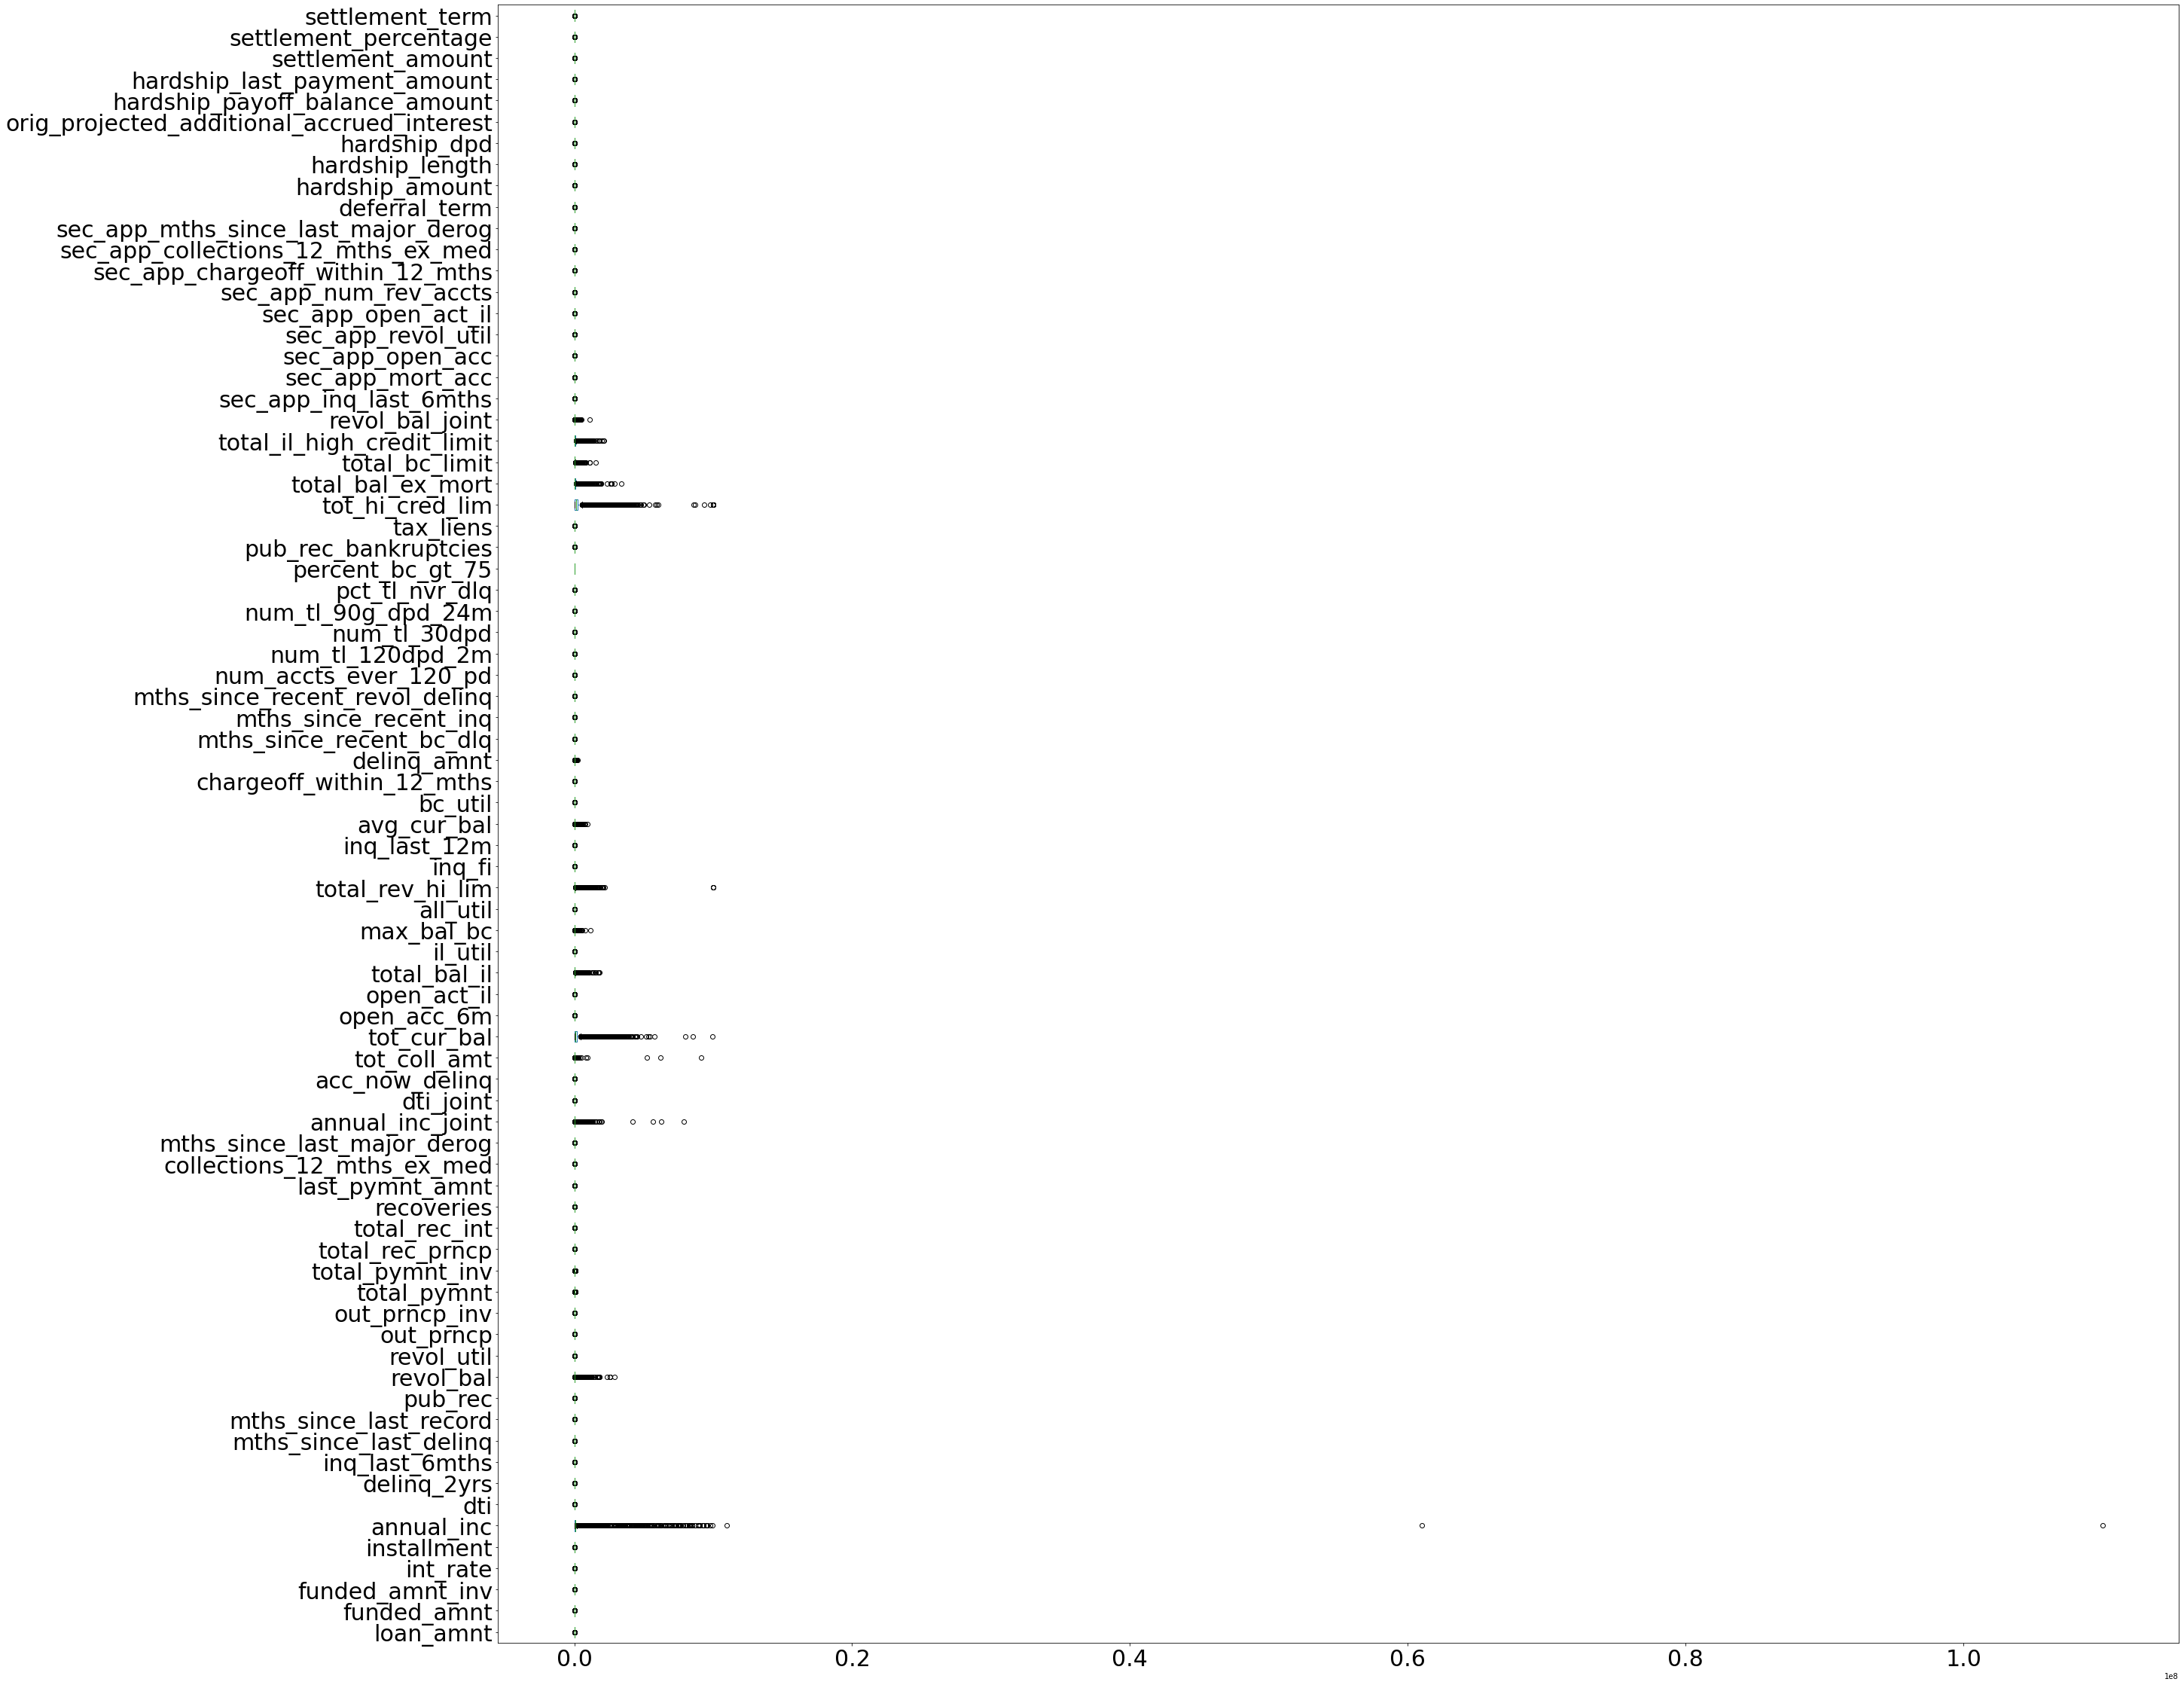

In [11]:
boxplot = df_num_select.boxplot(grid=False, vert=False,fontsize=30, figsize=(40,40))

In [12]:
desc.annual_inc

count    2.260668e+06
mean     7.799229e+04
std      1.126961e+05
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      1.100000e+08
Name: annual_inc, dtype: float64

In [16]:
desc['annual_inc']['75%']

93000.0

# Note:  annual_inc has outliers

Removing outliers

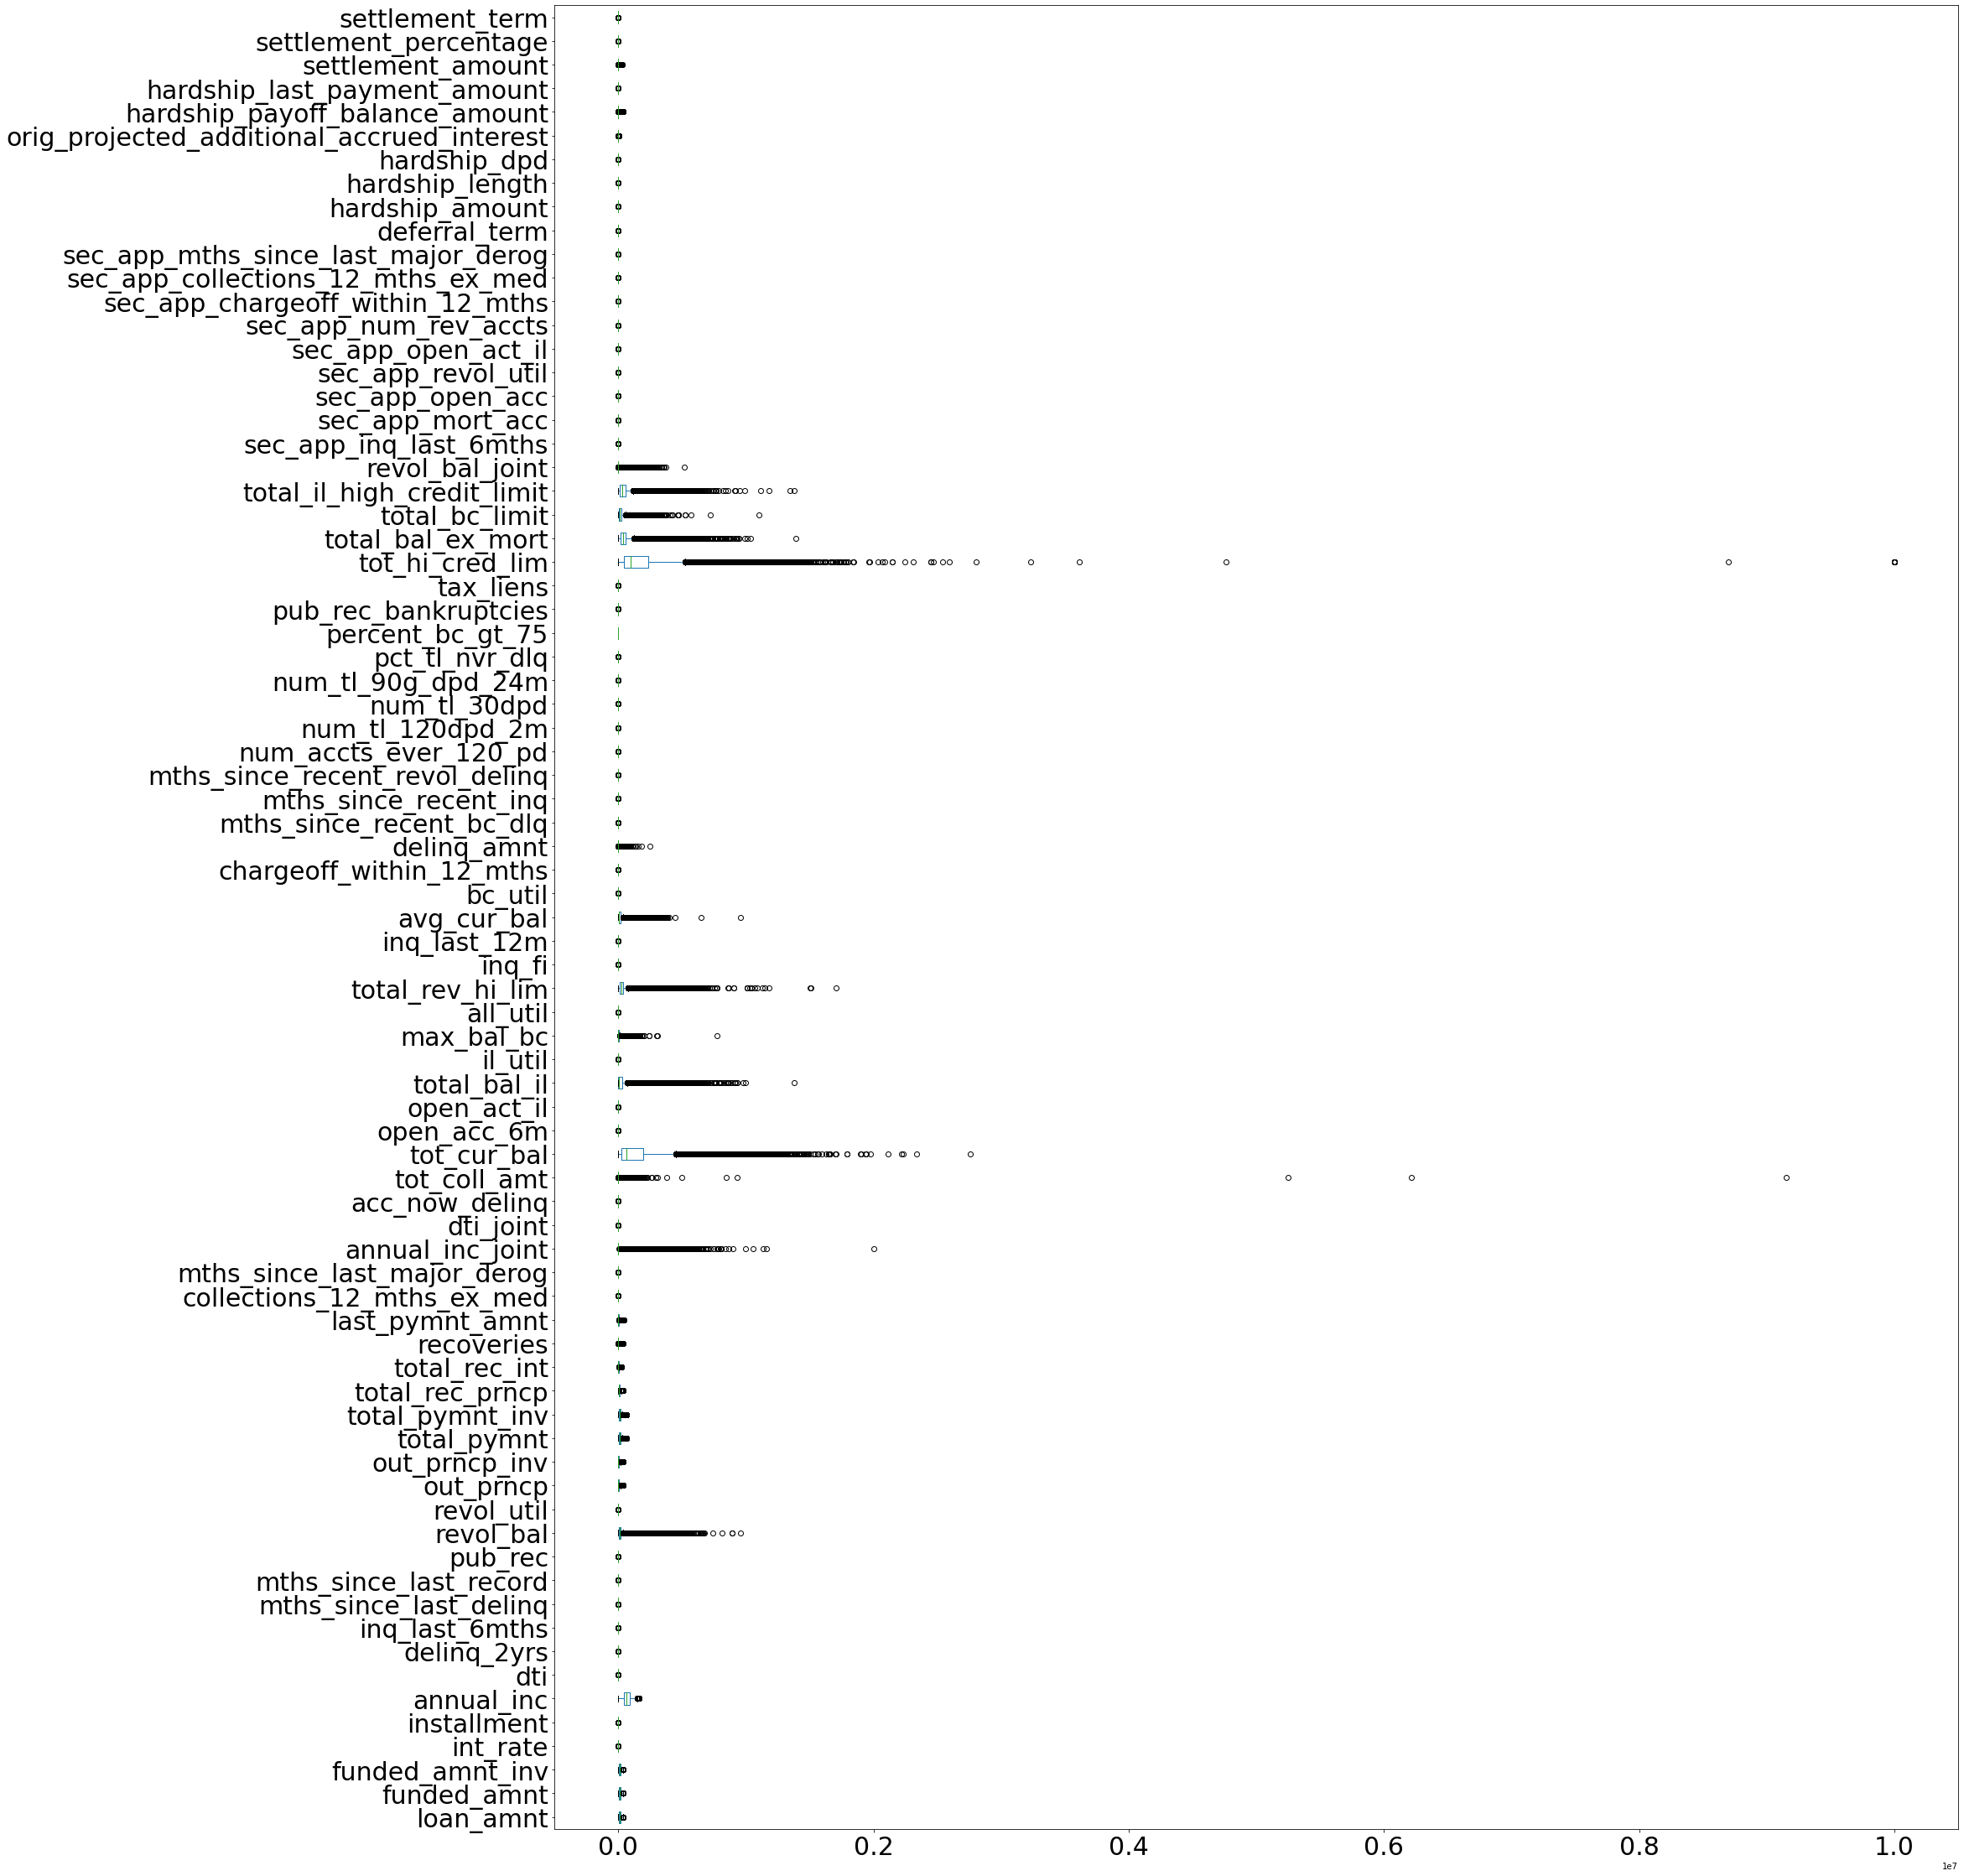

In [21]:
Q1 = df_num_select.quantile(0.25)
Q3 = df_num_select.quantile(0.75)
IQR = Q3 - Q1
#df_num_select_no = df_num_select[~((df_num_select < (Q1 - 1.5 * IQR)) |(df_num_select> (Q3 + 1.5 * IQR))).any(axis=1)]
# With 1.5 * IQR, about 85% of the data got removed!

# Using 6.5 * IQR
#df_num_select_no = df_num_select[~((df_num_select < (Q1 - 6.5 * IQR)) |(df_num_select> (Q3 + 6.5 * IQR))).any(axis=1)]
# With 1.5 * IQR, about 65% of the data got removed!

# The data appears to be one-sided.  Only removing outliers < Q1 - 1.5 * IQR
#df_num_select_no = df_num_select[~((df_num_select< (Q1 - 1.5 * IQR))).any(axis=1)]

# Removing rows with > Q3 annual income
Q1_inc = desc['annual_inc']['25%']
Q3_inc = desc['annual_inc']['75%']
IQR_inc = Q3_inc - Q1_inc
threshold = Q3_inc + 1.5 * IQR_inc
df_num_select_no = df_num_select[df_num_select['annual_inc'] <= threshold]

boxplot = df_num_select_no.boxplot(grid=False, vert=False,fontsize=30, figsize=(30,40))

In [22]:
df_num_select_no.shape

(2150627, 77)

In [23]:
df_num_select.shape

(2260668, 77)

In [24]:
df_num_select_no.head()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  annual_inc  \
0       2500         2500           2500.0     13.56        84.92     55000.0   
1      30000        30000          30000.0     18.94       777.23     90000.0   
2       5000         5000           5000.0     17.97       180.69     59280.0   
3       4000         4000           4000.0     18.94       146.51     92000.0   
4      30000        30000          30000.0     16.14       731.78     57250.0   

     dti  delinq_2yrs  inq_last_6mths  mths_since_last_delinq  ...  \
0  18.24          0.0             1.0                     0.0  ...   
1  26.52          0.0             0.0                    71.0  ...   
2  10.51          0.0             0.0                     0.0  ...   
3  16.74          0.0             0.0                     0.0  ...   
4  26.35          0.0             0.0                     0.0  ...   

   deferral_term  hardship_amount  hardship_length  hardship_dpd  \
0            0.0              0.0              0.0           0.0   
1            0.0              0.0              0.0           0.0   
2            0.0              0.0              0.0           0.0   
3            0.0              0.0              0.0           0.0   
4            0.0              0.0              0.0           0.0   

   orig_projected_additional_accrued_interest  hardship_payoff_balance_amount  \
0                                         0.0                             0.0   
1                                         0.0                             0.0   
2                                         0.0                             0.0   
3                                         0.0                             0.0   
4                                         0.0                             0.0   

   hardship_last_payment_amount  settlement_amount  settlement_percentage  \
0                           0.0                0.0                    0.0   
1                           0.0                0.0                    0.0   
2                           0.0                0.0                    0.0   
3                           0.0                0.0                    0.0   
4                           0.0                0.0                    0.0   

   settlement_term  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 77 columns]

In [25]:
df_num_select_no.tail()

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  installment  \
2260663      12000        12000          12000.0     14.08       279.72   
2260664      12000        12000          12000.0     25.82       358.01   
2260665      10000        10000          10000.0     11.99       332.10   
2260666      12000        12000          12000.0     21.45       327.69   
2260667      16550        16550          16550.0     21.45       451.94   

         annual_inc    dti  delinq_2yrs  inq_last_6mths  \
2260663     58000.0  20.88          0.0             0.0   
2260664     30000.0  19.28          3.0             1.0   
2260665     64000.0  12.96          0.0             0.0   
2260666     60000.0  30.82          2.0             1.0   
2260667     60000.0  18.40          0.0             1.0   

         mths_since_last_delinq  ...  deferral_term  hardship_amount  \
2260663                     0.0  ...            0.0              0.0   
2260664                    13.0  ...            0.0              0.0   
2260665                     0.0  ...            0.0              0.0   
2260666                     7.0  ...            0.0              0.0   
2260667                     0.0  ...            0.0              0.0   

         hardship_length  hardship_dpd  \
2260663              0.0           0.0   
2260664              0.0           0.0   
2260665              0.0           0.0   
2260666              0.0           0.0   
2260667              0.0           0.0   

         orig_projected_additional_accrued_interest  \
2260663                                         0.0   
2260664                                         0.0   
2260665                                         0.0   
2260666                                         0.0   
2260667                                         0.0   

         hardship_payoff_balance_amount  hardship_last_payment_amount  \
2260663                             0.0                           0.0   
2260664                             0.0                           0.0   
2260665                             0.0                           0.0   
2260666                             0.0                           0.0   
2260667                             0.0                           0.0   

         settlement_amount  settlement_percentage  settlement_term  
2260663                0.0                    0.0              0.0  
2260664                0.0                    0.0              0.0  
2260665                0.0                    0.0              0.0  
2260666                0.0                    0.0              0.0  
2260667                0.0                    0.0              0.0  

[5 rows x 77 columns]

## Explore data relationships

In [18]:
# Make pairplot --- This was a bad idea!  77 x 77 = 5929

#plt.figure(figsize=(20,100))
#g = sns.pairplot(df_num_select_no, height=5)

In [26]:
# Check correlation of data
corr = df_num_select_no.corr()

In [27]:
plt.figure(figsize=(40,40))
#plot it in the next line
corr.round(2).style.background_gradient(cmap='coolwarm')

<Figure size 2880x2880 with 0 Axes>

In [28]:

# Make a heatmap of the data
sns.set(font_scale=1.4)
fig, ax = plt.subplots(figsize=(200,200))
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True, ax=ax)

In [29]:
# Step 1. Call the variable corr_matrix
corr_matrix = df_num_select_no.corr().abs()

# Step 2. get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.9
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.9.
to_drop = [column for column in corr_matrix.columns if any(upper[column] > 0.9)]

In [30]:
to_drop

['funded_amnt',
 'funded_amnt_inv',
 'installment',
 'out_prncp_inv',
 'total_pymnt_inv',
 'total_rec_prncp',
 'tot_hi_cred_lim',
 'sec_app_num_rev_accts',
 'hardship_length',
 'hardship_payoff_balance_amount']

In [31]:
df_num_select_no.drop(to_drop, axis=1, inplace=True)
df_num_select_no.shape

C:\Users\Umesh\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(2150627, 67)

In [32]:
# Separate object dtype columns from original dataframe
df_cat = df.select_dtypes(include=[np.object])

In [33]:
# Merge object columns with the processed numerical columns
df_new = df_num_select_no.merge(df_cat, how='inner', left_index=True, right_index=True)

In [34]:
df_new.head()

loan_amnt  int_rate  annual_inc    dti  delinq_2yrs  inq_last_6mths  \
0       2500     13.56     55000.0  18.24          0.0             1.0   
1      30000     18.94     90000.0  26.52          0.0             0.0   
2       5000     17.97     59280.0  10.51          0.0             0.0   
3       4000     18.94     92000.0  16.74          0.0             0.0   
4      30000     16.14     57250.0  26.35          0.0             0.0   

   mths_since_last_delinq  mths_since_last_record  pub_rec  revol_bal  ...  \
0                     0.0                    45.0      1.0       4341  ...   
1                    71.0                    75.0      1.0      12315  ...   
2                     0.0                     0.0      0.0       4599  ...   
3                     0.0                     0.0      0.0       5468  ...   
4                     0.0                     0.0      0.0        829  ...   

   initial_list_status  application_type  verification_status_joint  \
0                    w        Individual                        NaN   
1                    w        Individual                        NaN   
2                    w        Individual                        NaN   
3                    w        Individual                        NaN   
4                    w        Individual                        NaN   

   hardship_flag  hardship_type  hardship_reason  hardship_status  \
0              N            NaN              NaN              NaN   
1              N            NaN              NaN              NaN   
2              N            NaN              NaN              NaN   
3              N            NaN              NaN              NaN   
4              N            NaN              NaN              NaN   

   hardship_loan_status  debt_settlement_flag  settlement_status  
0                   NaN                     N                NaN  
1                   NaN                     N                NaN  
2                   NaN                     N                NaN  
3                   NaN                     N                NaN  
4                   NaN                     N                NaN  

[5 rows x 87 columns]

In [35]:
df_new.shape

(2150627, 87)

In [36]:
df_new.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'pub_rec', 'revol_bal', 'revol_util', 'out_prncp', 'total_pymnt',
       'total_rec_int', 'recoveries', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'total_bal_il', 'il_util',
       'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m',
       'avg_cur_bal', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies',
       'tax_liens', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_l

# 'loan_status' seems to be a good response variable

In [ ]:
'''
Column = loan_status:
 Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64 
'''

'\nColumn = loan_status:\n Fully Paid                                             1041952\nCurrent                                                 919695\nCharged Off                                             261655\nLate (31-120 days)                                       21897\nIn Grace Period                                           8952\nLate (16-30 days)                                         3737\nDoes not meet the credit policy. Status:Fully Paid        1988\nDoes not meet the credit policy. Status:Charged Off        761\nDefault                                                     31\nName: loan_status, dtype: int64 \n'

# Note:  Based on loan_status data, decided to predict 'Fully Paid' and 'Charged Off' instead of 'Default'.

# Statistics grouped by loan_status


In [37]:
desc_new = df_new.groupby('loan_status').describe()

In [40]:
desc_new.T

loan_status              Charged Off        Current       Default  \
loan_amnt       count  253510.000000  867316.000000     31.000000   
                mean    15228.542069   15300.649677  15800.000000   
                std      8584.754840    9391.972017  10009.210342   
                min       900.000000    1000.000000   1000.000000   
                25%      8750.000000    8000.000000   7412.500000   
...                              ...            ...           ...   
settlement_term min         0.000000       0.000000      0.000000   
                25%         0.000000       0.000000      0.000000   
                50%         0.000000       0.000000      0.000000   
                75%         0.000000       0.000000      0.000000   
                max       181.000000      18.000000     18.000000   

loan_status            Does not meet the credit policy. Status:Charged Off  \
loan_amnt       count                                          715.00000     
                mean                                          8959.72028     
                std                                           5926.81291     
                min                                            500.00000     
                25%                                           5000.00000     
...                                                                  ...     
settlement_term min                                              0.00000     
                25%                                              0.00000     
                50%                                              0.00000     
                75%                                              0.00000     
                max                                             18.00000     

loan_status            Does not meet the credit policy. Status:Fully Paid  \
loan_amnt       count                                        1886.000000    
                mean                                         8495.042418    
                std                                          5866.048229    
                min                                           500.000000    
                25%                                          4000.000000    
...                                                                  ...    
settlement_term min                                             0.000000    
                25%                                             0.000000    
                50%                                             0.000000    
                75%                                             0.000000    
                max                                             0.000000    

loan_status               Fully Paid  In Grace Period  Late (16-30 days)  \
loan_amnt       count  994300.000000      8418.000000        3533.000000   
                mean    13684.743790     17121.653005       16436.718087   
                std      8331.878286      9483.638724        9556.960575   
                min       500.000000      1000.000000        1000.000000   
                25%      7200.000000     10000.000000        9600.000000   
...                              ...              ...                ...   
settlement_term min         0.000000         0.000000           0.000000   
                25%         0.000000         0.000000           0.000000   
                50%         0.000000         0.000000           0.000000   
                75%         0.000000         0.000000           0.000000   
                max        14.000000        18.000000          18.000000   

loan_status            Late (31-120 days)  
loan_amnt       count        20918.000000  
                mean         16261.431542  
                std           9375.812389  
                min           1000.000000  
                25%           9775.000000  
...                                   ...  
settlement_term min              0.000000  
                25%              0.000000  


In [41]:
# Write your dataframe to csv 
df_new.to_csv("data/Cap2_step3_output.csv")